# Import Data

In [80]:
import numpy as np
import pandas as pd
import matplotlib as plt
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import plot_tree

Shape of X before SMOTE: (6380, 46)
Shape of X after SMOTE: (9138, 46)

Balance of positive and negative classes (%):
model_version is LogisticRegression()
              precision    recall  f1-score   support

           1       0.57      0.66      0.61       902
           0       0.61      0.52      0.56       926

    accuracy                           0.59      1828
   macro avg       0.59      0.59      0.59      1828
weighted avg       0.59      0.59      0.59      1828

[[591 311]
 [440 486]]


C:\Users\wills\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\wills\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


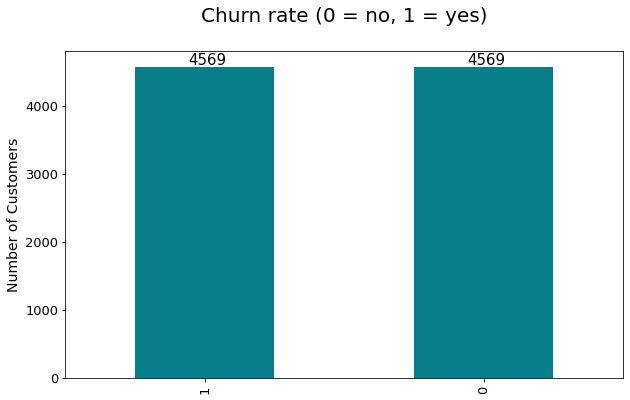

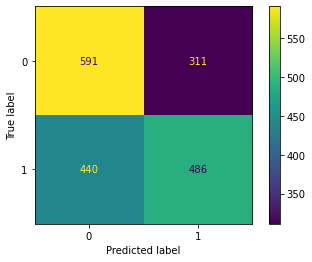

model_version is RandomForestClassifier()
              precision    recall  f1-score   support

           1       0.75      0.82      0.78       902
           0       0.81      0.73      0.77       926

    accuracy                           0.78      1828
   macro avg       0.78      0.78      0.78      1828
weighted avg       0.78      0.78      0.78      1828

[[739 163]
 [247 679]]


C:\Users\wills\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


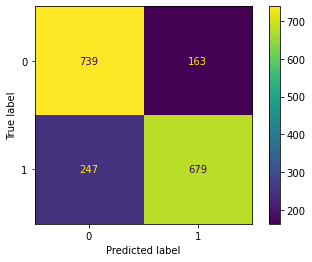

model_version is KNeighborsClassifier()
              precision    recall  f1-score   support

           1       0.73      0.55      0.63       902
           0       0.65      0.80      0.72       926

    accuracy                           0.68      1828
   macro avg       0.69      0.68      0.67      1828
weighted avg       0.69      0.68      0.67      1828

[[494 408]
 [181 745]]


C:\Users\wills\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


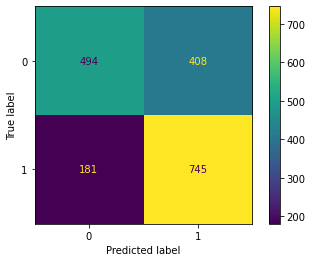

model_version is SVC()
              precision    recall  f1-score   support

           1       0.57      0.51      0.54       902
           0       0.57      0.63      0.60       926

    accuracy                           0.57      1828
   macro avg       0.57      0.57      0.57      1828
weighted avg       0.57      0.57      0.57      1828

[[459 443]
 [340 586]]


C:\Users\wills\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


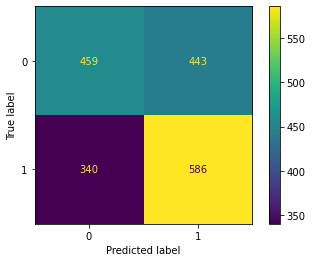

model_version is GaussianNB()
              precision    recall  f1-score   support

           1       0.66      0.35      0.45       902
           0       0.56      0.82      0.67       926

    accuracy                           0.59      1828
   macro avg       0.61      0.59      0.56      1828
weighted avg       0.61      0.59      0.56      1828

[[313 589]
 [163 763]]


C:\Users\wills\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


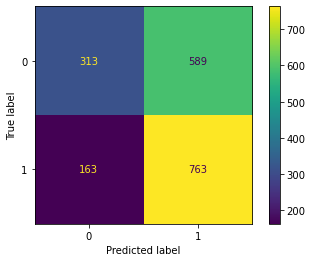

In [59]:
# Feature exploration 
df = pd.read_csv(r'C:\Users\wills\AI_Project\Data\cell2celltrain_Small_6k.csv')
le = LabelEncoder()
cat_list = ['ServiceArea', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 
 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 
 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 
 'NotNewCellphoneUser',  'OwnsMotorcycle', 'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 
 'Occupation', 'MaritalStatus', 'Churn']

X = df


for i in cat_list:
    X[f'c_{i}'] = le.fit_transform(df[f"{i}"])
    
"""
X = X[['DroppedCalls','CustomerCareCalls','ReceivedCalls', 
       'PercChangeRevenues','PercChangeMinutes','OverageMinutes', 
       'MonthlyMinutes','MonthlyRevenue','c_Churn','IncomeGroup','RetentionCalls'
]]
"""

X = df._get_numeric_data()

X = X.replace('?',0)
X = X.fillna(0)


corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

#print(le.inverse_transform(X['c_Churn']))
y = X["c_Churn"]

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

ax = X_sm['c_Churn'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Churn rate (0 = no, 1 = yes)', size=20, pad=30)
ax.set_ylabel('Number of Customers', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 40, str(round(i.get_height(), 2)), fontsize=15)  
    

X_sm = X_sm.drop(columns=["c_Churn"])
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.20, random_state=0)

models = [

      ('LogReg', LogisticRegression()),

      ('RF', RandomForestClassifier()),

      ('KNN', KNeighborsClassifier()),

      ('SVM', SVC()),

      ('GNB', GaussianNB())

    ]

scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']

target_names = ['1', '0']

for name, model in models:
    print(f"model_version is {model}")
    if name == RandomForestClassifier():
        print(model.feature_importances_)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=target_names))
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    plot_confusion_matrix(model, X_test, y_test)  
    plt.show()  

In [67]:
"""
#X["yes_churn"] = X.loc[X["c_Churn"]==1]
X_corr = X.loc[X["c_Churn"]==(1,)]
print(X_corr)
corr = X_corr.corr()
corr.style.background_gradient(cmap='coolwarm')
"""


'\n#X["yes_churn"] = X.loc[X["c_Churn"]==1]\nX_corr = X.loc[X["c_Churn"]==(1,)]\nprint(X_corr)\ncorr = X_corr.corr()\ncorr.style.background_gradient(cmap=\'coolwarm\')\n'

In [121]:
X["c_Churn"].value_counts()

0    4569
1    1811
Name: c_Churn, dtype: int64

In [153]:
y = X["c_Churn"]
X = X.drop(columns=["c_Churn"])

<AxesSubplot:xlabel='MonthlyRevenue', ylabel='DroppedCalls'>

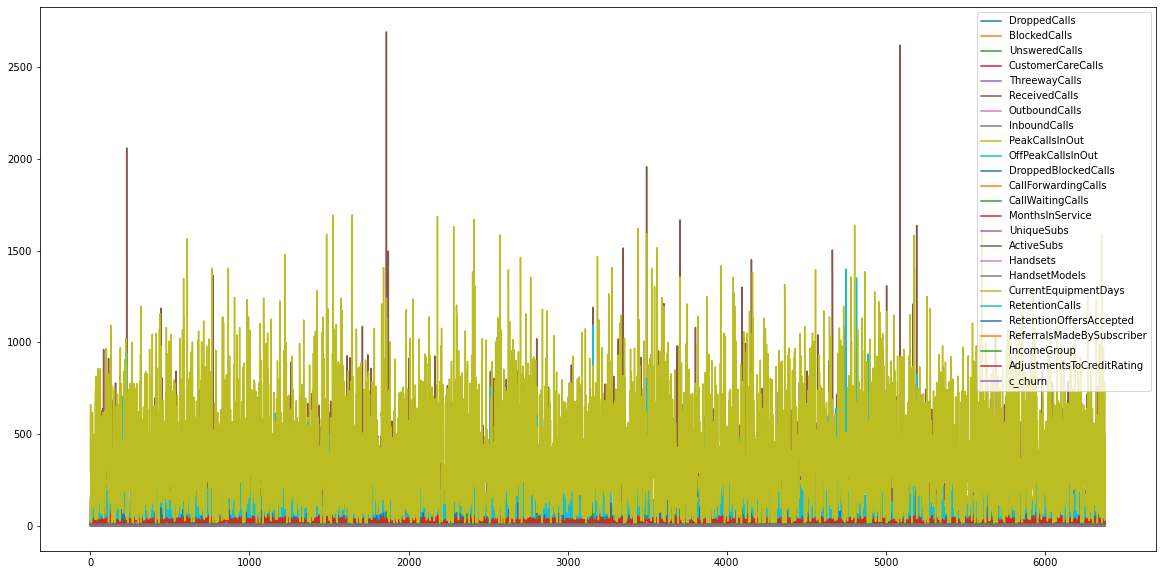

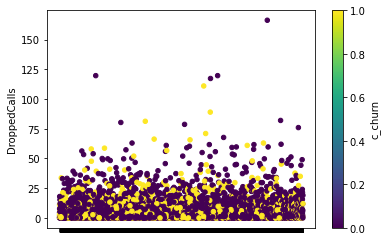

In [51]:
df.plot(figsize=(20,10))
df.plot.scatter(x="MonthlyRevenue",y="DroppedCalls",c="c_churn",colormap='viridis')

In [144]:
#Final Model following hyperparameter tuning
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.33, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.73
              precision    recall  f1-score   support

           0       0.73      0.99      0.84      1530
           1       0.50      0.02      0.05       576

    accuracy                           0.73      2106
   macro avg       0.61      0.51      0.44      2106
weighted avg       0.67      0.73      0.62      2106



C:\Users\wills\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
# Model experimentation
y = X["c_Churn"]
X = X.drop(columns=["c_Churn"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

models = [

      ('LogReg', LogisticRegression()),

      ('RF', RandomForestClassifier()),

      ('KNN', KNeighborsClassifier())

    ]

scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']

target_names = ['1', '0']

for name, model in models:
    print(f"model_version is {model}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=target_names))
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
  
        

KeyError: 'c_Churn'

      DroppedCalls  CustomerCareCalls  ReceivedCalls PercChangeRevenues  \
0             11.0               11.3          136.3                0.1   
1              0.3                0.0           23.1              -15.5   
2              4.7                7.3          198.5               -2.6   
3              1.0                0.0          127.5                  0   
4              5.7               22.0          134.8                0.2   
...            ...                ...            ...                ...   
6375           6.0                1.7           12.8                0.5   
6376           3.0                0.0           26.8               59.3   
6377          19.0                2.3          211.4              -29.6   
6378          12.0                1.7           38.5               75.7   
6379           6.3                0.3          373.9                  0   

     PercChangeMinutes OverageMinutes MonthlyMinutes MonthlyRevenue  c_Churn  \
0                 -

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,0.021143,0.000746,0.202459,0.010013,ball_tree,2,"{'algorithm': 'ball_tree', 'n_neighbors': 2}",0.752190,0.728261,0.776720,0.766631,0.787751,0.762311,0.020665,1
25,0.033112,0.010275,1.378515,0.226133,brute,2,"{'algorithm': 'brute', 'n_neighbors': 2}",0.752190,0.728261,0.776720,0.766631,0.787592,0.762279,0.020626,2
1,0.029122,0.001716,0.093949,0.005062,auto,2,"{'algorithm': 'auto', 'n_neighbors': 2}",0.751250,0.728261,0.776483,0.765823,0.787751,0.761913,0.020695,3
17,0.032912,0.002523,0.137434,0.047860,kd_tree,2,"{'algorithm': 'kd_tree', 'n_neighbors': 2}",0.751250,0.728261,0.776483,0.765823,0.787751,0.761913,0.020695,3
8,0.021742,0.000399,0.195078,0.004212,ball_tree,1,"{'algorithm': 'ball_tree', 'n_neighbors': 1}",0.709355,0.702800,0.735593,0.720698,0.733389,0.720367,0.012895,5
24,0.015559,0.008383,1.119206,0.242546,brute,1,"{'algorithm': 'brute', 'n_neighbors': 1}",0.709355,0.702800,0.734970,0.720698,0.733613,0.720288,0.012796,6
16,0.031116,0.001933,0.095746,0.006242,kd_tree,1,"{'algorithm': 'kd_tree', 'n_neighbors': 1}",0.708069,0.702800,0.735593,0.720698,0.733389,0.720110,0.013123,7
0,0.022943,0.002597,0.084967,0.003691,auto,1,"{'algorithm': 'auto', 'n_neighbors': 1}",0.708069,0.702800,0.735593,0.720698,0.733389,0.720110,0.013123,7
27,0.050864,0.034966,1.278986,0.166581,brute,4,"{'algorithm': 'brute', 'n_neighbors': 4}",0.677346,0.662281,0.734486,0.717131,0.716148,0.701478,0.027087,9
3,0.031516,0.001017,0.121475,0.028162,auto,4,"{'algorithm': 'auto', 'n_neighbors': 4}",0.677714,0.662281,0.733469,0.716418,0.715578,0.701092,0.026630,10


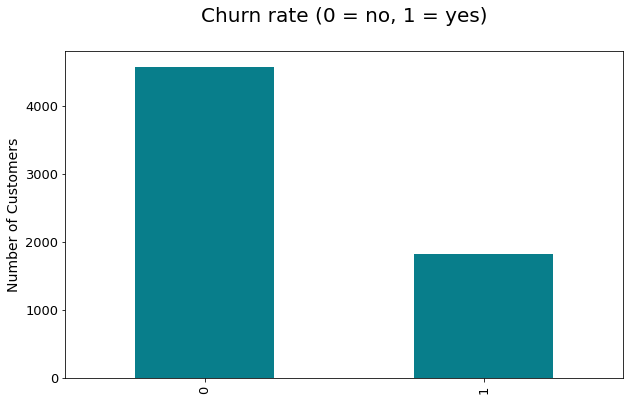

In [63]:
#KNN Hyperparameter tuning
df = pd.read_csv(r'C:\Users\wills\AI_Project\Data\cell2celltrain_Small_6k.csv')
le = LabelEncoder()
cat_list = ['ServiceArea', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 
 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 
 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 
 'NotNewCellphoneUser',  'OwnsMotorcycle', 'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 
 'Occupation', 'MaritalStatus', 'Churn']

X = df


for i in cat_list:
    X[f'c_{i}'] = le.fit_transform(df[f"{i}"])
    
X
    

X = X[['DroppedCalls','CustomerCareCalls','ReceivedCalls', 
       'PercChangeRevenues','PercChangeMinutes','OverageMinutes', 
       'MonthlyMinutes','MonthlyRevenue','c_Churn','IncomeGroup','RetentionCalls'
]]

print(X)
X = X.replace('?',0)
X = X.fillna(0) 

"""
X = df._get_numeric_data()
"""

y = X["c_Churn"]

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

ax = df['c_Churn'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Churn rate (0 = no, 1 = yes)', size=20, pad=30)
ax.set_ylabel('Number of Customers', fontsize=14)

X_sm = X_sm.drop(columns=["c_Churn"])
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.20, random_state=0)

Knn = KNeighborsClassifier() 

param_grid = { 
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
}

CV_rfc = GridSearchCV(estimator=Knn, param_grid=param_grid, cv= 5, scoring='precision', n_jobs=-1)
results = CV_rfc.fit(X_sm, y_sm)
print(CV_rfc.best_params_)
opt = pd.DataFrame(results.cv_results_)
opt = opt.sort_values(by='rank_test_score')
opt.head(10)

Shape of X before SMOTE: (6380, 11)
Shape of X after SMOTE: (9138, 11)

Balance of positive and negative classes (%):
{'criterion': 'entropy', 'n_estimators': 400}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,13.307554,0.321410,0.232980,0.007316,entropy,400,"{'criterion': 'entropy', 'n_estimators': 400}",0.633479,0.643873,0.852298,0.848385,0.844007,0.764408,0.102746,1
13,26.469461,1.519572,0.400921,0.034513,entropy,1000,"{'criterion': 'entropy', 'n_estimators': 1000}",0.632385,0.647155,0.853939,0.845649,0.842912,0.764408,0.101938,2
12,24.003476,0.755655,0.391859,0.018244,entropy,750,"{'criterion': 'entropy', 'n_estimators': 750}",0.635667,0.647155,0.855033,0.840722,0.842365,0.764189,0.100435,3
2,5.547804,0.077677,0.166763,0.002970,gini,300,"{'criterion': 'gini', 'n_estimators': 300}",0.640591,0.642232,0.850656,0.840722,0.841270,0.763094,0.099418,4
9,9.922092,0.198583,0.183908,0.020821,entropy,300,"{'criterion': 'entropy', 'n_estimators': 300}",0.637309,0.652079,0.849562,0.842365,0.831965,0.762656,0.096591,5
11,16.638990,0.412475,0.290033,0.008765,entropy,500,"{'criterion': 'entropy', 'n_estimators': 500}",0.632932,0.648249,0.851751,0.839080,0.840722,0.762547,0.099790,6
8,6.731929,0.222118,0.118283,0.001739,entropy,200,"{'criterion': 'entropy', 'n_estimators': 200}",0.635120,0.650985,0.844639,0.841817,0.839628,0.762438,0.097620,7
6,19.695398,0.446645,0.598402,0.031962,gini,1000,"{'criterion': 'gini', 'n_estimators': 1000}",0.637856,0.649344,0.850109,0.835249,0.835796,0.761671,0.096620,8
4,9.687652,0.316535,0.282245,0.013631,gini,500,"{'criterion': 'gini', 'n_estimators': 500}",0.633479,0.651532,0.849015,0.834154,0.834154,0.760467,0.096637,9
7,3.136622,0.035527,0.060438,0.001353,entropy,100,"{'criterion': 'entropy', 'n_estimators': 100}",0.631838,0.644967,0.851751,0.832512,0.837438,0.759701,0.099328,10


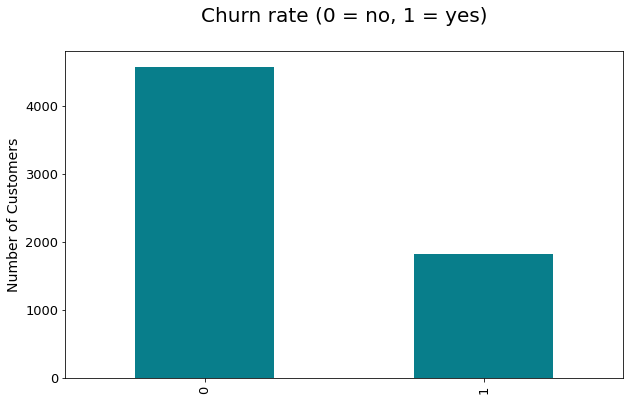

In [70]:
#Random Forest Hyperparameter Tuning
df = pd.read_csv(r'C:\Users\wills\AI_Project\Data\cell2celltrain_Small_6k.csv')
le = LabelEncoder()
cat_list = ['ServiceArea', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 
 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 
 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 
 'NotNewCellphoneUser',  'OwnsMotorcycle', 'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 
 'Occupation', 'MaritalStatus', 'Churn']

X = df


for i in cat_list:
    X[f'c_{i}'] = le.fit_transform(df[f"{i}"])
    

X = X[['DroppedCalls','CustomerCareCalls','ReceivedCalls', 
       'PercChangeRevenues','PercChangeMinutes','OverageMinutes', 
       'MonthlyMinutes','MonthlyRevenue','c_Churn','IncomeGroup','RetentionCalls'
]]


X = X.replace('?',0)
X = X.fillna(0) 

"""
X = df._get_numeric_data()
"""
y = X["c_Churn"]

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

ax = df['c_Churn'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Churn rate (0 = no, 1 = yes)', size=20, pad=30)
ax.set_ylabel('Number of Customers', fontsize=14)

X_sm = X_sm.drop(columns=["c_Churn"])
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.20, random_state=0)

RF = RandomForestClassifier()

param_grid = { 
    'n_estimators': [100, 200, 300, 400, 500, 750, 1000],
    'criterion': ['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=RF, param_grid=param_grid, cv= 5, scoring='f1_micro', n_jobs=-1)
results = CV_rfc.fit(X_sm, y_sm)
print(CV_rfc.best_params_)
opt = pd.DataFrame(results.cv_results_)
opt = opt.sort_values(by='rank_test_score')
opt.head(10)

Accuracy of random forest classifier on test set: 0.79
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       941
           1       0.77      0.79      0.78       887

    accuracy                           0.79      1828
   macro avg       0.78      0.79      0.78      1828
weighted avg       0.79      0.79      0.79      1828



C:\Users\wills\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


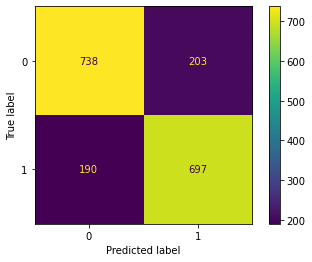

<AxesSubplot:>

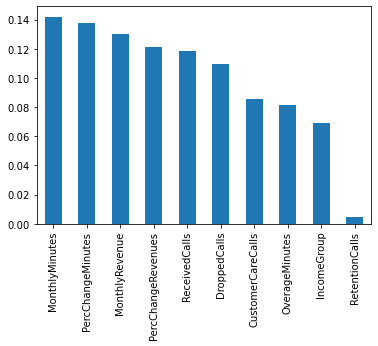

In [84]:
#Final Model following hyperparameter tuning
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.20, random_state=42)
RF = RandomForestClassifier(criterion='entropy',n_estimators=400)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(RF.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(RF, X_test, y_test) 
plt.show()
feat_importances = pd.Series(RF.feature_importances_, index=X_sm.columns)
feat_importances.nlargest(10).plot(kind='bar')


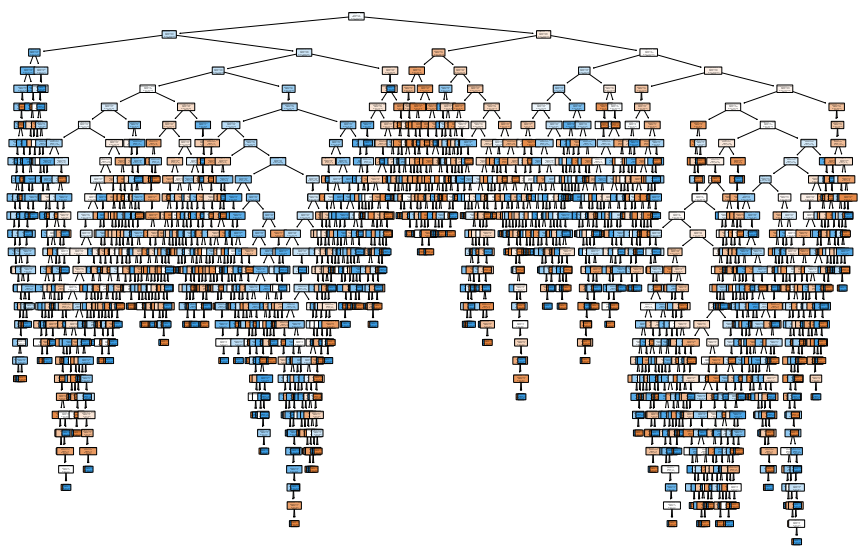

In [85]:
fig = plt.figure(figsize=(15, 10))
plot_tree(RF.estimators_[0], 
          feature_names=X_sm.columns,
          class_names='Churn', 
          filled=True, impurity=True, 
          rounded=True)
plt.show()